<a href="https://colab.research.google.com/github/ilushaKolosov/Diploma/blob/main/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('financial_data.csv')
features = data[['RSI(6)', 'RSI(12)', 'RSI(24)', 'MA(6)', 'MA(12)', 'MA(24)', 'EMA(6)', 'EMA(12)', 'EMA(24)']]
target = data['Crypto Price']

# Scale features and target
feature_scaler = MinMaxScaler()
features_scaled = feature_scaler.fit_transform(features)

target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

# Build and compile model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Predict prices on test data
y_pred_scaled = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled)  # Convert back to original scale
y_test = target_scaler.inverse_transform(y_test)  # Convert back to original scale

# Calculate difference between predicted and actual prices
price_difference = y_pred.flatten() - y_test.flatten()

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot actual vs predicted prices
plt.figure(figsize=(14, 10))

# Plot price predictions
plt.subplot(2, 1, 1)
plt.bar(range(len(y_test)), y_test.flatten(), width=0.4, label='Actual Price', color='blue', alpha=0.6, align='center')
plt.bar(range(len(y_pred)), y_pred.flatten(), width=0.4, label='Predicted Price', color='red', alpha=0.6, align='edge')
plt.title('Actual vs Predicted Prices')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot price difference
plt.subplot(2, 1, 2)
plt.bar(range(len(price_difference)), price_difference, color='purple', alpha=0.7)
plt.title('Prediction Difference')
plt.xlabel('Index')
plt.ylabel('Price Difference')
plt.ylim(min(price_difference) * 1.1, max(price_difference) * 1.1)  # Set y-axis range to fit both positive and negative values
plt.grid(True)

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [2]:
import pandas as pd

# Путь к вашему CSV-файлу
input_file = 'binance_full_data.csv'

# Чтение CSV-файла в DataFrame
df = pd.read_csv(input_file)

# Удаление строк, которые содержат 0 в любом из столбцов
df_filtered = df[(df != 0).all(axis=1)]

# Перезапись исходного CSV-файла очищенными данными
df_filtered.to_csv(input_file, index=False)

print(f'Данные успешно обновлены в файле {input_file}')

Данные успешно обновлены в файле binance_full_data.csv


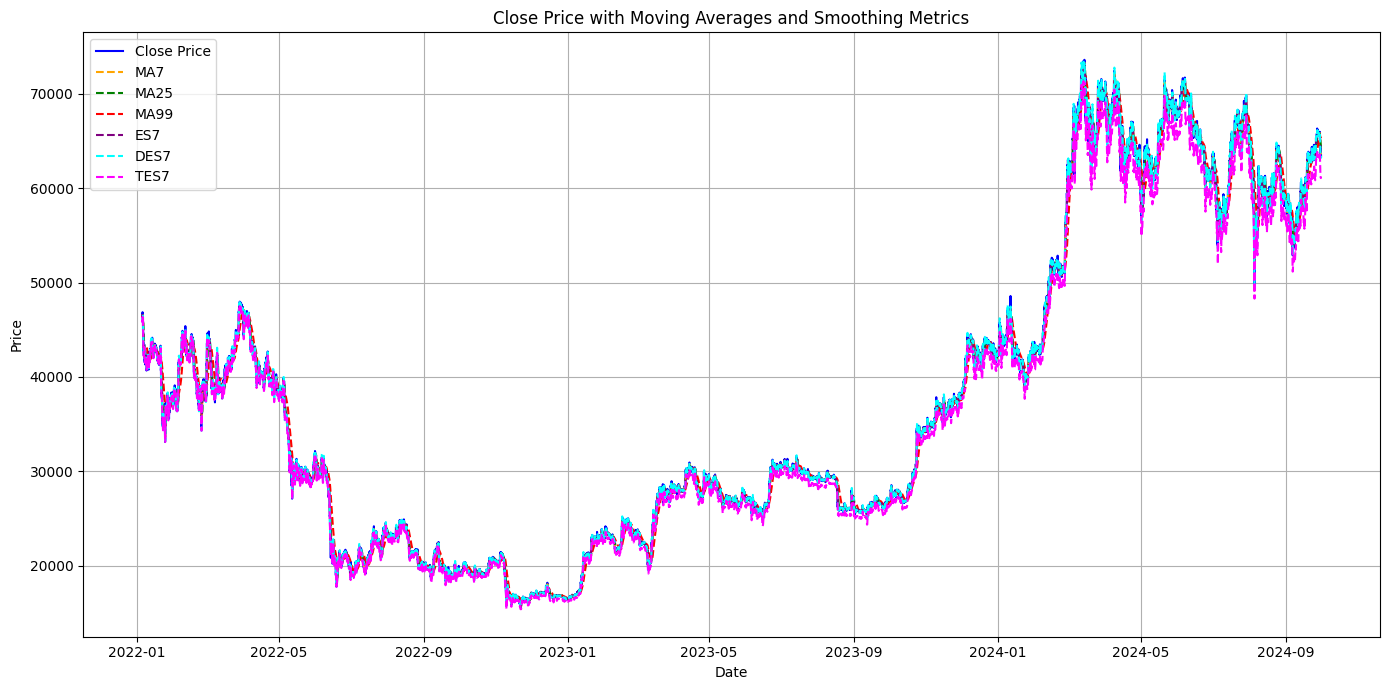

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('binance_full_data.csv', delimiter=',')  # Укажите разделитель, если нужно

# Преобразование временной метки в datetime
data['Open Time'] = pd.to_datetime(data['Open Time'])  # Убедитесь, что заголовок правильный
data.set_index('Open Time', inplace=True)  # Установите временную метку как индекс

# Убедитесь, что типы данных корректные
data['Close Price'] = data['Close Price'].astype(float)

# Вычисление скользящих средних
data['MA7'] = data['Close Price'].rolling(window=7).mean()
data['MA25'] = data['Close Price'].rolling(window=25).mean()
data['MA99'] = data['Close Price'].rolling(window=99).mean()

# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(data['Close Price'], label='Close Price', color='blue')
plt.plot(data['MA7'], label='MA7', color='orange', linestyle='--')
plt.plot(data['MA25'], label='MA25', color='green', linestyle='--')
plt.plot(data['MA99'], label='MA99', color='red', linestyle='--')

# Добавление ES7, DES7, TES7 на график
plt.plot(data['ES7'], label='ES7', color='purple', linestyle='--')
plt.plot(data['DES7'], label='DES7', color='cyan', linestyle='--')
plt.plot(data['TES7'], label='TES7', color='magenta', linestyle='--')

# Добавление заголовка и меток
plt.title('Close Price with Moving Averages and Smoothing Metrics')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# Визуализация исходного ряда для понимания тренда и сезонности
plt.figure(figsize=(10, 6))
plt.plot(close_prices)
plt.title('Временной ряд закрывающих цен')
plt.show()


NameError: name 'close_prices' is not defined

<Figure size 1000x600 with 0 Axes>

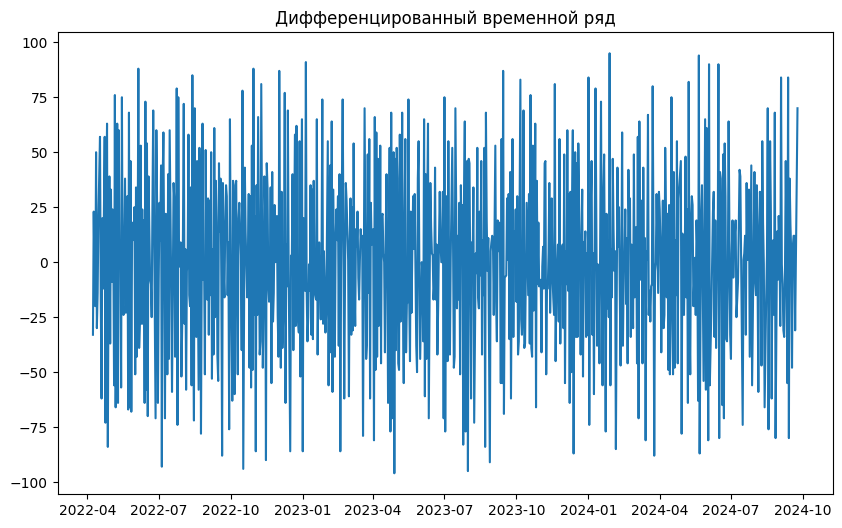

In [ ]:
# Дифференцирование ряда
close_prices_diff = close_prices.diff().dropna()

# Визуализация дифференцированного ряда
plt.figure(figsize=(10, 6))
plt.plot(close_prices_diff)
plt.title('Дифференцированный временной ряд')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


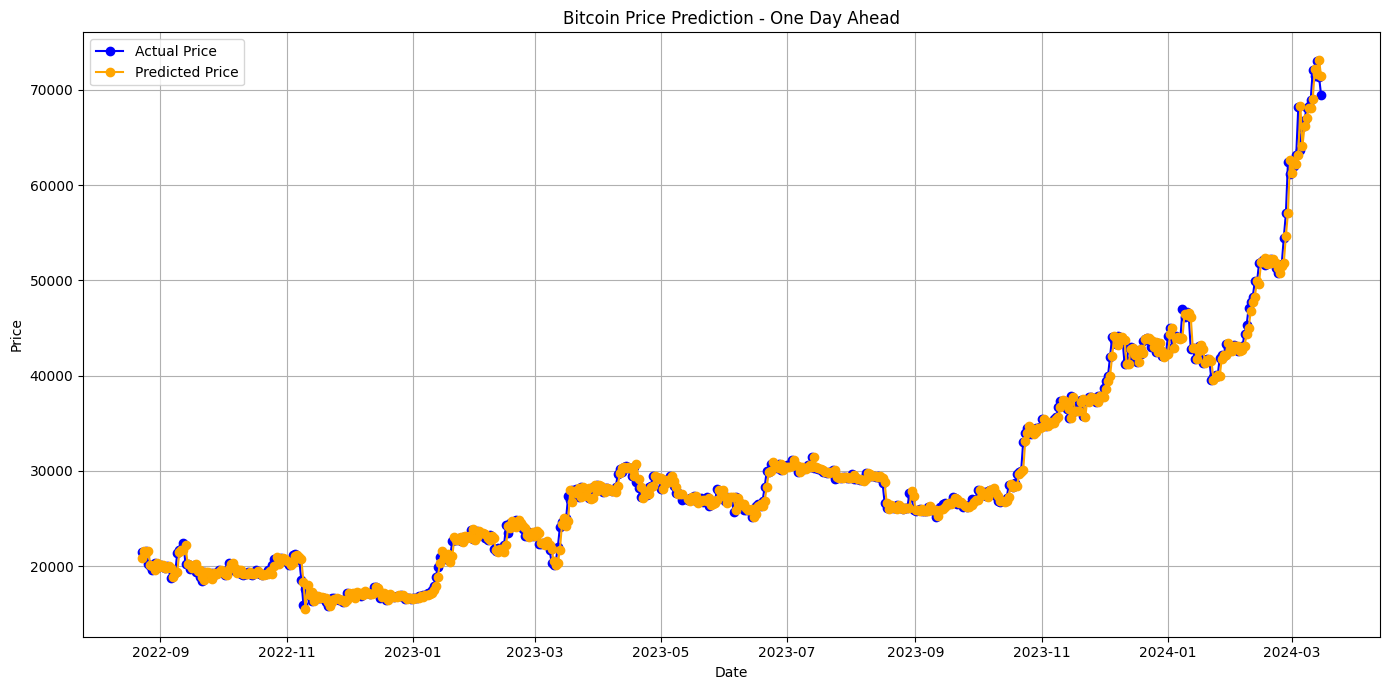

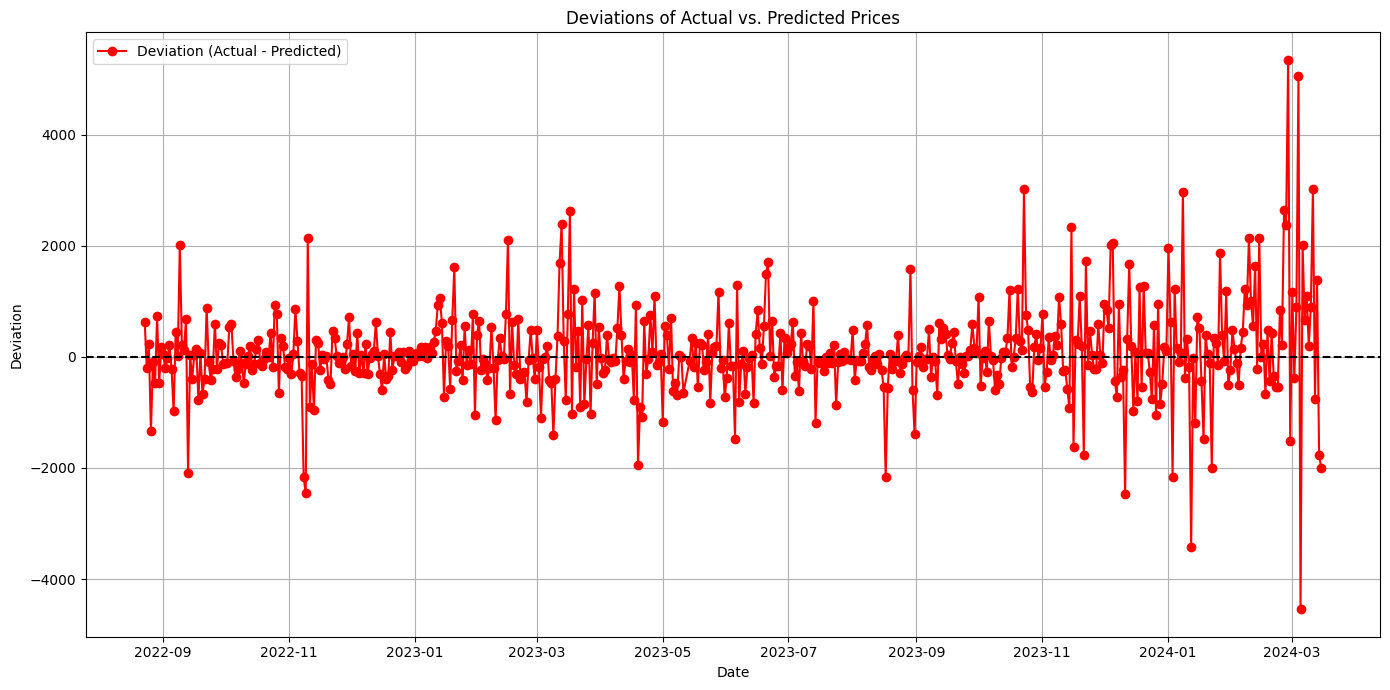

ValueError: x and y must have same first dimension, but have shapes (568,) and (569,)

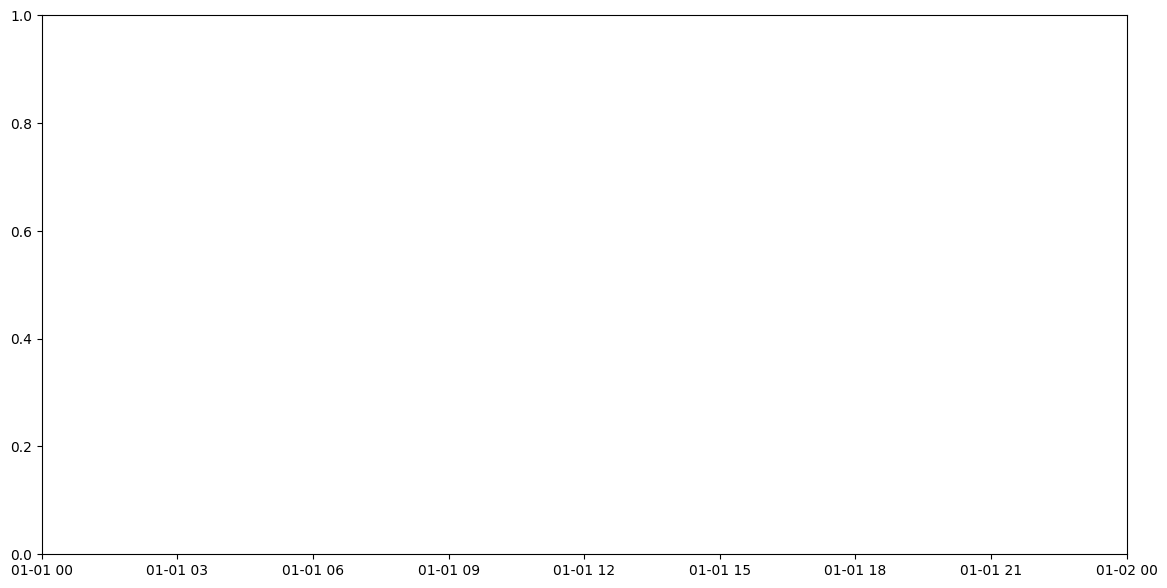

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Загрузка данных
data = pd.read_csv('binance_full_data.csv', delimiter=',')
data['Open Time'] = pd.to_datetime(data['Open Time'])
data.set_index('Open Time', inplace=True)

# Функция для вычисления MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Обучение и прогнозирование
predictions = []
actuals = []
mape_values = []

# Используем только 'Close Price' для прогнозирования
close_prices = data['Close Price'].values

# Обучение модели и предсказание на каждый день
for i in range(30, len(close_prices)):
    train = close_prices[i-30:i]  # Последние 30 дней для обучения
    model = ARIMA(train, order=(5, 1, 0))  # Параметры ARIMA можно настроить
    model_fit = model.fit()  # Убираем параметр disp

    # Прогнозируем на следующий день
    forecast = model_fit.forecast(steps=1)
    predictions.append(forecast[0])
    actuals.append(close_prices[i])

    # Вычисляем MAPE
    if len(actuals) > 0 and len(predictions) > 0:
        mape = mean_absolute_percentage_error(np.array(actuals[-1:]), np.array(predictions[-1:]))
        mape_values.append(mape)

# Выводим результаты
predictions = np.array(predictions)
actuals = np.array(actuals)

# График предсказанной и фактической цены
plt.figure(figsize=(14, 7))
plt.plot(data.index[30:], actuals, label='Actual Price', color='blue', marker='o')
plt.plot(data.index[30:], predictions, label='Predicted Price', color='orange', marker='o')
plt.title('Bitcoin Price Prediction - One Day Ahead')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# График отклонений
deviations = actuals - predictions
plt.figure(figsize=(14, 7))
plt.plot(data.index[30:], deviations, label='Deviation (Actual - Predicted)', color='red', marker='o')
plt.axhline(0, color='black', linestyle='--')
plt.title('Deviations of Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Deviation')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# График MAPE
# mape_values должен быть длины len(predictions), а не len(actuals)
plt.figure(figsize=(14, 7))
plt.plot(data.index[31:], mape_values, label='MAPE', color='green', marker='o')  # Используем индексы [31:] для MAPE
plt.title('MAPE for Each Prediction')
plt.xlabel('Date')
plt.ylabel('MAPE (%)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Вывод MAPE и предсказанных значений
for date, actual, predicted, mape in zip(data.index[30:], actuals, predictions, mape_values):
    print(f"Date: {date.date()}, Actual: {actual:.2f}, Predicted: {predicted:.2f}, MAPE: {mape:.2f}%")


LightGBM

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1687
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 7
[LightGBM] [Info] Start training from score 29692.615238
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

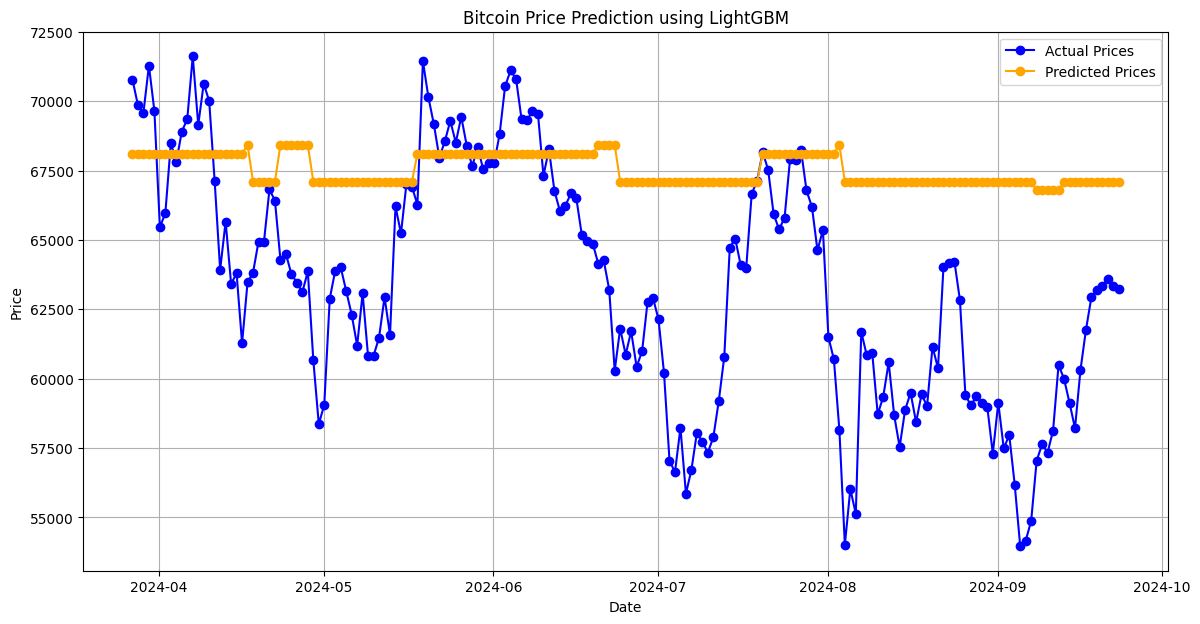

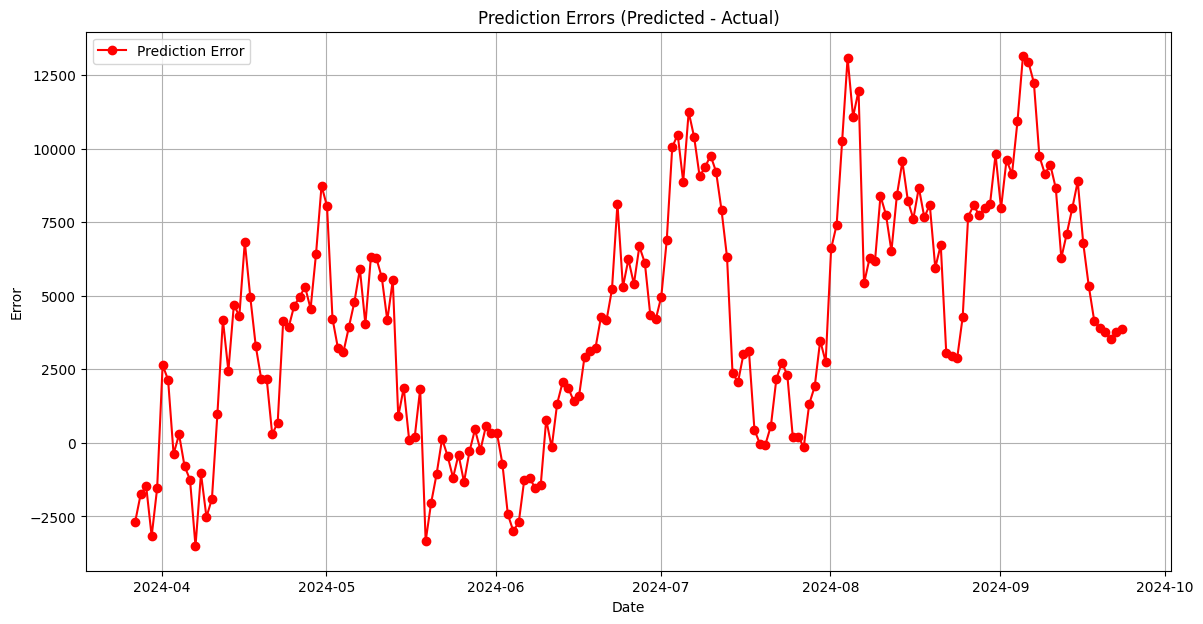

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Загрузка данных
data = pd.read_csv('binance_full_data.csv', delimiter=',')
data['Open Time'] = pd.to_datetime(data['Open Time'])
data.set_index('Open Time', inplace=True)
data['Close Price'] = data['Close Price'].astype(float)

# Подготовка данных
data['Target'] = data['Close Price'].shift(-1)  # Целевая переменная - цена на следующий день
data = data.dropna()  # Удаление строк с NaN

# Создание признаков
features = ['Close Price', 'MA7', 'MA25', 'MA99', 'ES7', 'DES7', 'TES7']
X = data[features]
y = data['Target']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Создание и обучение модели LightGBM
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

# Прогнозирование
predictions = model.predict(X_test)

# Вычисление ошибок
errors = predictions - y_test.values

# Вывод предсказанных и фактических значений
for actual, predicted in zip(y_test.values, predictions):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}, Error: {predicted - actual:.2f}")

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue', marker='o')
plt.plot(y_test.index, predictions, label='Predicted Prices', color='orange', marker='o')
plt.title('Bitcoin Price Prediction using LightGBM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Визуализация ошибок
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, errors, label='Prediction Error', color='red', marker='o')
plt.title('Prediction Errors (Predicted - Actual)')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()


LSTM

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0156 - val_loss: 3.0129e-05
Epoch 2/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3083e-05 - val_loss: 5.3300e-05
Epoch 3/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5010e-05 - val_loss: 3.3475e-05
Epoch 4/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.1065e-05 - val_loss: 2.9902e-05
Epoch 5/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.2653e-05 - val_loss: 3.4546e-05
Epoch 6/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.1995e-05 - val_loss: 5.6089e-05
Epoch 7/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.5650e-05 - val_loss: 4.3313e-05
Epoch 8/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.3409e-05 - val_loss: 3.6432e-05
Epoch 9/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.7258e-05 - val_loss: 2.7134e-05
Epoch 10/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5416e-05 - val_loss: 2.7864e-05
Epoch 11/100
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

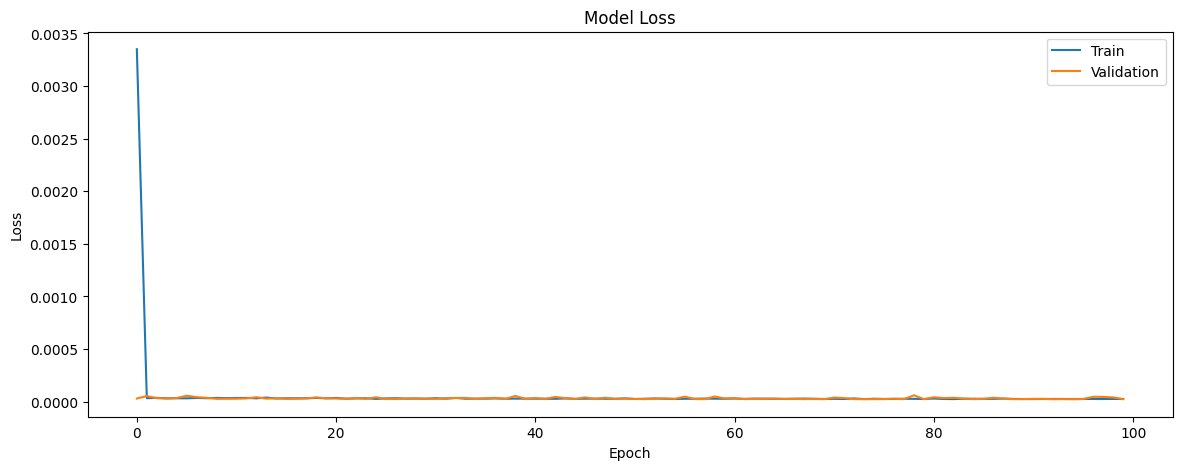

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


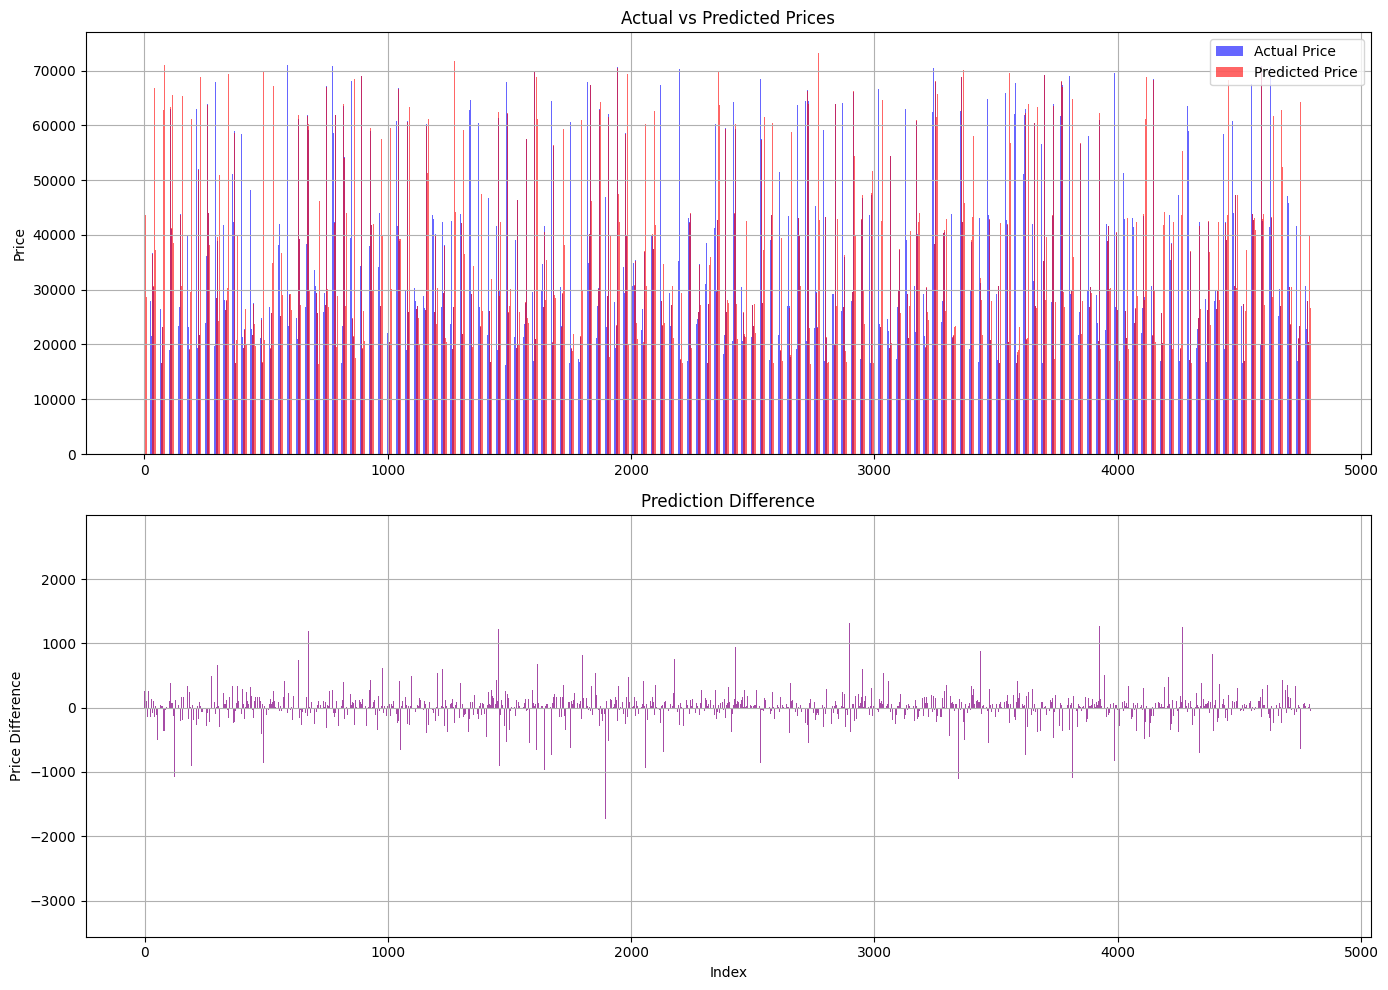

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('binance_full_data.csv')  # Убедитесь, что файл правильно указан

# Подготовка данных
# Сдвинем целевую переменную, чтобы предсказывать закрытую цену на следующий день
data['Next Close Price'] = data['Close Price'].shift(-1)

# Удалим последнюю строку, так как она будет иметь NaN в целевой переменной
data = data[:-1]

# Выбор признаков и целевой переменной
features = data[['Open Price', 'High Price', 'Low Price', 'Volume', 'MA7', 'MA25', 'MA99', 'ES7', 'DES7', 'TES7']]
target = data['Next Close Price']

# Масштабирование признаков и целевой переменной
feature_scaler = MinMaxScaler()
features_scaled = feature_scaler.fit_transform(features)

target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Разделение данных на обучающую и тестовую выборки (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

# Построение и компиляция модели
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Линейная активация для регрессии

model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Прогнозирование цен на тестовых данных
y_pred_scaled = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled)  # Преобразование обратно в оригинальный масштаб
y_test = target_scaler.inverse_transform(y_test)  # Преобразование обратно в оригинальный масштаб

# Вычисление разницы между предсказанными и фактическими ценами
price_difference = y_pred.flatten() - y_test.flatten()

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs(price_difference / y_test.flatten())) * 100

# Среднее колебание цены Биткоина за день
mean_price_change = np.mean(np.abs(np.diff(data['Close Price'])))
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Mean Daily Price Change: {mean_price_change}")

# Построение графика потерь
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Построение графика фактических и предсказанных цен
plt.figure(figsize=(14, 10))

# График предсказанных цен
plt.subplot(2, 1, 1)
plt.bar(range(len(y_test)), y_test.flatten(), width=0.4, label='Actual Price', color='blue', alpha=0.6, align='center')
plt.bar(range(len(y_pred)), y_pred.flatten(), width=0.4, label='Predicted Price', color='red', alpha=0.6, align='edge')
plt.title('Actual vs Predicted Prices')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# График разницы в цене
plt.subplot(2, 1, 2)
plt.bar(range(len(price_difference)), price_difference, color='purple', alpha=0.7)
plt.title('Prediction Difference')
plt.xlabel('Index')
plt.ylabel('Price Difference')
plt.ylim(min(price_difference) * 1.1, max(price_difference) * 1.1)  # Установка диапазона y
plt.grid(True)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0024 - val_loss: 4.0929e-04
Epoch 2/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.7969e-04 - val_loss: 1.7887e-04
Epoch 3/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4299e-04 - val_loss: 1.6716e-04
Epoch 4/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8052e-04 - val_loss: 3.6579e-04
Epoch 5/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1037e-04 - val_loss: 2.3382e-04
Epoch 6/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9928e-04 - val_loss: 2.2079e-04
Epoch 7/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.6155e-04 - val_loss: 1.0922e-04
Epoch 8/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3331e-04 - val_loss: 1.4352e-04
Epoch 9/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3079e-04 - val_loss: 9.0810e-05
Epoch 10/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5272e-04 - val_loss: 8.9014e-05
Epoch 11/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1

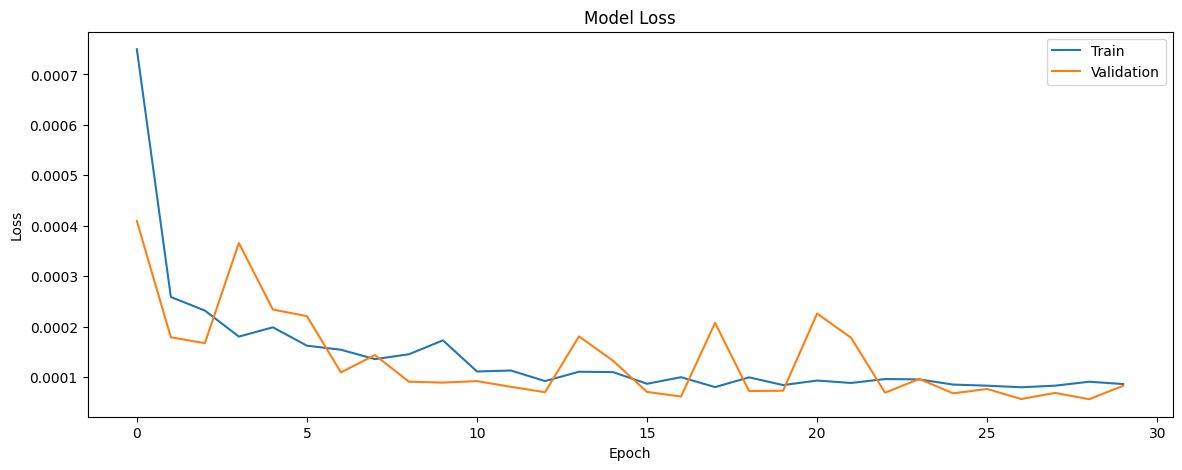

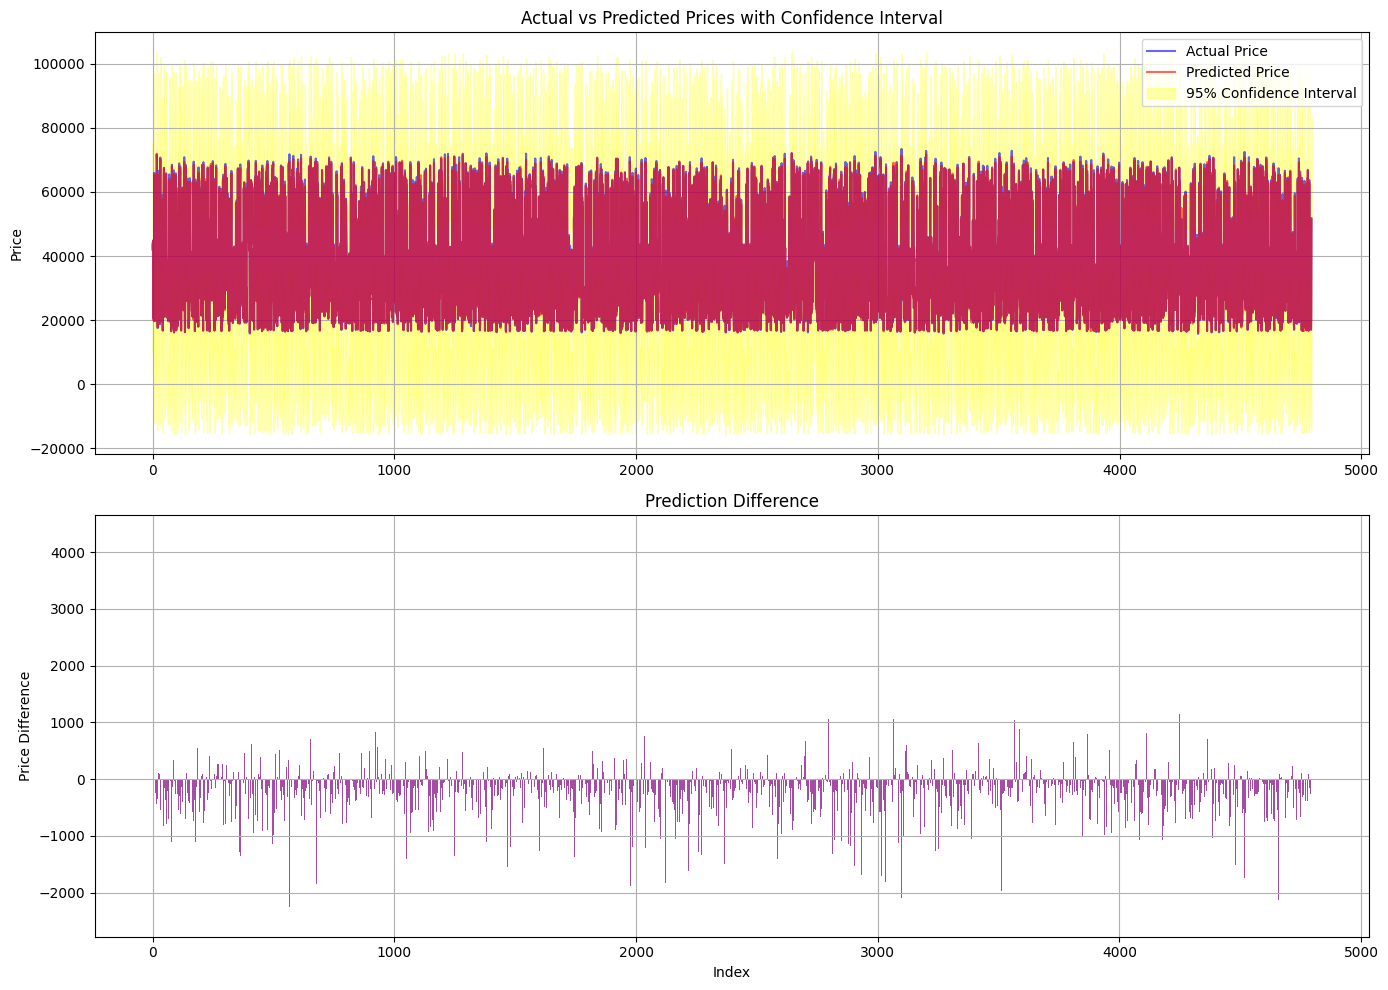

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('binance_full_data.csv')  # Убедитесь, что файл правильно указан

# Подготовка данных
# Сдвинем целевую переменную, чтобы предсказывать закрытую цену на следующий день
data['Next Close Price'] = data['Close Price'].shift(-24)  # Изменяем на 24 для предсказания на сутки вперед

# Удалим последние 24 строки, так как они будут иметь NaN в целевой переменной
data = data[:-24]

# Выбор признаков и целевой переменной (используем все доступные фичи)
features = data[['Open Price', 'High Price', 'Low Price', 'Close Price', 'Volume',
                 'MA7', 'MA25', 'MA99', 'MA200', 'ES7', 'ES25', 'ES99',
                 'DES7', 'DES25', 'DES99', 'TES7', 'TES25', 'TES99',
                 'EMA7', 'EMA25', 'EMA99', 'EMA200', 'RSI7', 'RSI14', 'RSI25']]
target = data['Next Close Price']

# Масштабирование признаков и целевой переменной
feature_scaler = MinMaxScaler()
features_scaled = feature_scaler.fit_transform(features)

target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Разделение данных на обучающую и тестовую выборки (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

# Построение и компиляция модели
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Линейная активация для регрессии

model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Прогнозирование цен на тестовых данных
y_pred_scaled = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled)  # Преобразование обратно в оригинальный масштаб
y_test = target_scaler.inverse_transform(y_test)  # Преобразование обратно в оригинальный масштаб

# Вычисление MAPE
mape = np.mean(np.abs((y_pred.flatten() - y_test.flatten()) / y_test.flatten())) * 100

# Вычисление изменения цены за день
daily_high = data['High Price'].shift(-23)  # Сдвиг для получения high за день
daily_low = data['Low Price'].shift(-23)    # Сдвиг для получения low за день
daily_price_change = (daily_high - daily_low) / data['Close Price'].shift(-23) * 100  # Находим дневное изменение
mean_daily_price_change = daily_price_change.mean()  # Среднее изменение за день

# Вывод результатов
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Mean Daily Price Change: {mean_daily_price_change}%")

# Построение графика потерь
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Построение графика фактических и предсказанных цен
plt.figure(figsize=(14, 10))

# График предсказанных цен
plt.subplot(2, 1, 1)
plt.bar(range(len(y_test)), y_test.flatten(), width=0.4, label='Actual Price', color='blue', alpha=0.6, align='center')
plt.bar(range(len(y_pred)), y_pred.flatten(), width=0.4, label='Predicted Price', color='red', alpha=0.6, align='edge')
plt.title('Actual vs Predicted Prices')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# График разницы в цене
plt.subplot(2, 1, 2)
price_difference = y_pred.flatten() - y_test.flatten()  # Разница
plt.bar(range(len(price_difference)), price_difference, color='purple', alpha=0.7)
plt.title('Prediction Difference')
plt.xlabel('Index')
plt.ylabel('Price Difference')
plt.ylim(min(price_difference) * 1.1, max(price_difference) * 1.1)  # Установка диапазона y
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('binance_full_data.csv')  # Убедитесь, что путь к файлу указан правильно

# Подготовка данных
# Создание столбца с целевой переменной - предсказание цены закрытия на следующий день
data['Next Close Price'] = data['Close Price'].shift(-1)

# Удалим последнюю строку, так как она будет иметь NaN в целевой переменной
data = data[:-1]

# Функция для создания запаздывающих признаков с учетом всех данных за последние (100 дней)
def create_lag_features(data, lag=100):
    features = pd.DataFrame()
    for i in range(1, lag + 1):
        features[f'Open Price lag_{i}'] = data['Open Price'].shift(i)
        features[f'High Price lag_{i}'] = data['High Price'].shift(i)
        features[f'Low Price lag_{i}'] = data['Low Price'].shift(i)
        features[f'Close Price lag_{i}'] = data['Close Price'].shift(i)
        features[f'Volume lag_{i}'] = data['Volume'].shift(i)
        features[f'MA7 lag_{i}'] = data['MA7'].shift(i)
        features[f'MA25 lag_{i}'] = data['MA25'].shift(i)
        features[f'MA99 lag_{i}'] = data['MA99'].shift(i)
        features[f'MA200 lag_{i}'] = data['MA200'].shift(i)
        features[f'ES7 lag_{i}'] = data['ES7'].shift(i)
        features[f'ES25 lag_{i}'] = data['ES25'].shift(i)
        features[f'ES99 lag_{i}'] = data['ES99'].shift(i)
        features[f'DES7 lag_{i}'] = data['DES7'].shift(i)
        features[f'DES25 lag_{i}'] = data['DES25'].shift(i)
        features[f'DES99 lag_{i}'] = data['DES99'].shift(i)
        features[f'TES7 lag_{i}'] = data['TES7'].shift(i)
        features[f'TES25 lag_{i}'] = data['TES25'].shift(i)
        features[f'TES99 lag_{i}'] = data['TES99'].shift(i)
        features[f'EMA7 lag_{i}'] = data['EMA7'].shift(i)
        features[f'EMA25 lag_{i}'] = data['EMA25'].shift(i)
        features[f'EMA99 lag_{i}'] = data['EMA99'].shift(i)
        features[f'EMA200 lag_{i}'] = data['EMA200'].shift(i)
        features[f'RSI7 lag_{i}'] = data['RSI7'].shift(i)
        features[f'RSI14 lag_{i}'] = data['RSI14'].shift(i)
        features[f'RSI25 lag_{i}'] = data['RSI25'].shift(i)
    return features

# Создаем признаки с лагом за последние 100 дней
features = create_lag_features(data, lag=100)

# Удалим строки с NaN, которые возникли из-за сдвига
features = features.dropna()

# Соответственно удалим последние строки из целевой переменной, чтобы они совпадали по размеру с признаками
target = data['Next Close Price'].iloc[100:].reset_index(drop=True)

# Масштабирование признаков и целевой переменной
feature_scaler = MinMaxScaler()
features_scaled = feature_scaler.fit_transform(features)

target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Разделение данных на обучающую и тестовую выборки (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

# Построение и компиляция модели с несколькими слоями
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Линейная активация для регрессии

model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Прогнозирование цен на тестовых данных
y_pred_scaled = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled)  # Преобразование обратно в оригинальный масштаб
y_test = target_scaler.inverse_transform(y_test)  # Преобразование обратно в оригинальный масштаб

# Вычисление разницы между предсказанными и фактическими ценами
price_difference = y_pred.flatten() - y_test.flatten()

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs(price_difference / y_test.flatten())) * 100

# Среднее колебание цены Биткоина за день
mean_price_change = np.mean(np.abs(np.diff(data['Close Price'])))
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Mean Daily Price Change: {mean_price_change}")

# Построение графика потерь
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Построение графика фактических и предсказанных цен
plt.figure(figsize=(14, 10))

# График предсказанных цен
plt.subplot(2, 1, 1)
plt.bar(range(len(y_test)), y_test.flatten(), width=0.4, label='Actual Price', color='blue', alpha=0.6, align='center')
plt.bar(range(len(y_pred)), y_pred.flatten(), width=0.4, label='Predicted Price', color='red', alpha=0.6, align='edge')
plt.title('Actual vs Predicted Prices')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# График разницы в цене
plt.subplot(2, 1, 2)
plt.bar(range(len(price_difference)), price_difference, color='purple', alpha=0.7)
plt.title('Prediction Difference')
plt.xlabel('Index')
plt.ylabel('Price Difference')
plt.ylim(min(price_difference) * 1.1, max(price_difference) * 1.1)  # Установка диапазона y
plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-4-73257bf56af4>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features[f'Open Price lag_{i}'] = data['Open Price'].shift(i)
<ipython-input-4-73257bf56af4>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features[f'High Price lag_{i}'] = data['High Price'].shift(i)
<ipython-input-4-73257bf56af4>:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

Epoch 1/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - loss: 0.0238 - val_loss: 0.0016
Epoch 2/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 83s 22ms/step - loss: 0.0011 - val_loss: 5.2206e-04
Epoch 3/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 81s 21ms/step - loss: 8.7898e-04 - val_loss: 5.0471e-04
Epoch 4/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - loss: 6.0958e-04 - val_loss: 0.0019
Epoch 5/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 82s 21ms/step - loss: 7.1822e-04 - val_loss: 4.2547e-04
Epoch 6/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - loss: 5.0033e-04 - val_loss: 0.0011
Epoch 7/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 83s 21ms/step - loss: 4.2364e-04 - val_loss: 3.6802e-04
Epoch 8/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 82s 22ms/step - loss: 3.1656e-04 - val_loss: 2.7279e-04
Epoch 9/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 81s 21ms/step - loss: 3.4096e-04 - val_loss: 4.0068e-04
Epoch 10/100


KeyboardInterrupt: 

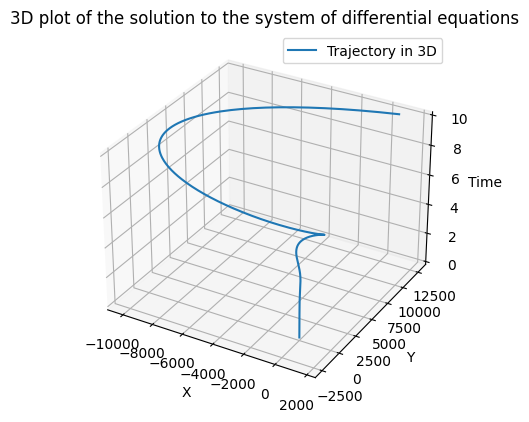

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Определяем систему дифференциальных уравнений
def system(t, z):
    x, y = z
    dxdt = x + 3*y
    dydt = -x + y
    return [dxdt, dydt]

# Интервал времени для решения
t_span = (0, 10)
# Начальные условия (например, x(0) = 1, y(0) = 0)
initial_conditions = [1, 0]
# Массив времени для решения
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Численное решение системы
sol = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval)

# Извлекаем решения для x и y
x = sol.y[0]
y = sol.y[1]
t = sol.t

# Построение 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Строим график x(t), y(t), t
ax.plot(x, y, t, label='Trajectory in 3D')

# Подписи осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Time')

ax.set_title('3D plot of the solution to the system of differential equations')

plt.legend()
plt.show()


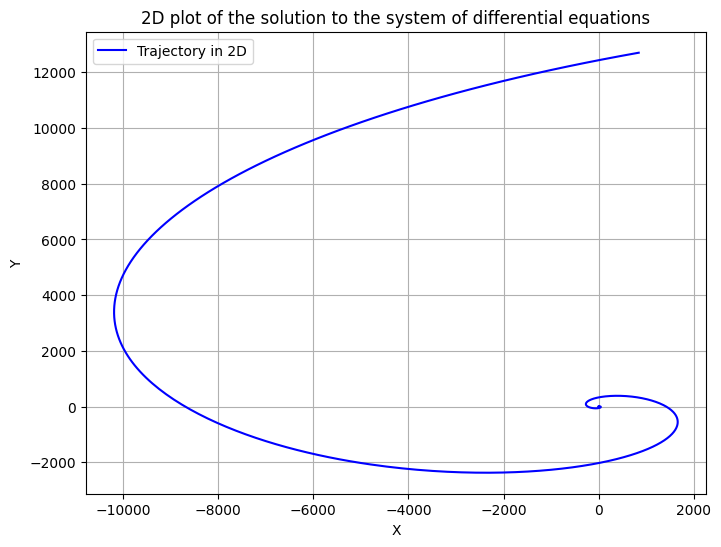

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Определяем систему дифференциальных уравнений
def system(t, z):
    x, y = z
    dxdt = x + 3*y
    dydt = -x + y
    return [dxdt, dydt]

# Интервал времени для решения
t_span = (0, 10)
# Начальные условия (например, x(0) = 1, y(0) = 0)
initial_conditions = [1, 0]
# Массив времени для решения
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Численное решение системы
sol = solve_ivp(system, t_span, initial_conditions, t_eval=t_eval)

# Извлекаем решения для x и y
x = sol.y[0]
y = sol.y[1]

# Построение 2D графика
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Trajectory in 2D', color='b')

# Подписи осей
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D plot of the solution to the system of differential equations')

plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
from scipy.linalg import eig, sinm, inv

# Заданная матрица A
A = np.array([[3, 0, 4, 1],
              [0, 1, 2, 4],
              [4, 2, 4, 1],
              [1, 4, 1, 5]])

# 1. Собственные значения и собственные векторы
eigenvalues, eigenvectors = eig(A)

# 2. Спектральный радиус (максимальное по модулю собственное значение)
spectral_radius = np.max(np.abs(eigenvalues))

# 3. Собственные векторы
# Собственные векторы находятся уже в переменной eigenvectors

# 4. Приведение к диагональному виду
# A = V * Λ * V^(-1), где Λ - диагональная матрица собственных значений
V = eigenvectors
Lambda = np.diag(eigenvalues)  # Диагональная матрица собственных значений
V_inv = inv(V)

# Восстановим A из диагонализированной формы для проверки
A_diag = V @ Lambda @ V_inv

# 5. Вычисление sin(A) с использованием диагонального вида
# sin(A) = V * sin(Λ) * V^(-1)
sin_Lambda = np.sin(Lambda)  # Считаем синус для диагональной матрицы
sin_A_diag = V @ sin_Lambda @ V_inv  # Восстанавливаем sin(A)

# Альтернативно можно вычислить sin(A) напрямую через стандартные методы
sin_A_direct = sinm(A)

# Вывод результатов
print("Собственные значения матрицы A:")
print(eigenvalues)

print("\nСпектральный радиус матрицы A:")
print(spectral_radius)

print("\nСобственные векторы матрицы A (столбцы):")
print(eigenvectors)

print("\nДиагональная матрица Λ (собственные значения на диагонали):")
print(Lambda)

print("\nСинус матрицы A (через диагональную форму):")
print(sin_A_diag)

Собственные значения матрицы A:
[ 9.52677075+0.j  5.55688554+0.j  0.22127326+0.j -2.30492956+0.j]

Спектральный радиус матрицы A:
9.526770752403046

Собственные векторы матрицы A (столбцы):
[[ 0.43383345  0.51252548 -0.63321447 -0.38489687]
 [ 0.40249244 -0.33606124  0.44502217 -0.72596002]
 [ 0.56386895  0.48380489  0.52747647  0.41201117]
 [ 0.57605571 -0.62475059 -0.3503759   0.39380609]]

Диагональная матрица Λ (собственные значения на диагонали):
[[ 9.52677075+0.j  0.        +0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  5.55688554+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.22127326+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j -2.30492956+0.j]]

Синус матрицы A (через диагональную форму):
[[-0.21559775+0.j -0.17268319+0.j -0.1451524 +0.j  0.34842622+0.j]
 [-0.17268319+0.j -0.43929568+0.j  0.35844517+0.j  0.01498577+0.j]
 [-0.1451524 +0.j  0.35844517+0.j -0.25278081+0.j  0.0066397 +0.j]
 [ 0.34842622+0.j  0.01498577

Training will be performed on: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


<ipython-input-3-5f85775da0cd>:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features[f'Open Price lag_{i}'] = data['Open Price'].shift(i)
<ipython-input-3-5f85775da0cd>:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features[f'High Price lag_{i}'] = data['High Price'].shift(i)
<ipython-input-3-5f85775da0cd>:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

Epoch 1/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0149 - val_loss: 0.0026
Epoch 2/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0012 - val_loss: 6.4604e-04
Epoch 3/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 9.5501e-04 - val_loss: 7.9736e-04
Epoch 4/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 7.4112e-04 - val_loss: 4.2866e-04
Epoch 5/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.9395e-04 - val_loss: 3.3079e-04
Epoch 6/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.2240e-04 - val_loss: 4.9737e-04
Epoch 7/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4.8222e-04 - val_loss: 3.6950e-04
Epoch 8/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 3.9139e-04 - val_loss: 2.0891e-04
Epoch 9/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2.9703e-04 - val_loss: 1.8653e-04
Epoch 10/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.5177e-04 - val_loss: 0.0011
Epoch 11/100
1979/1979 ━━━━━━━━━━━━━━━━━━━━

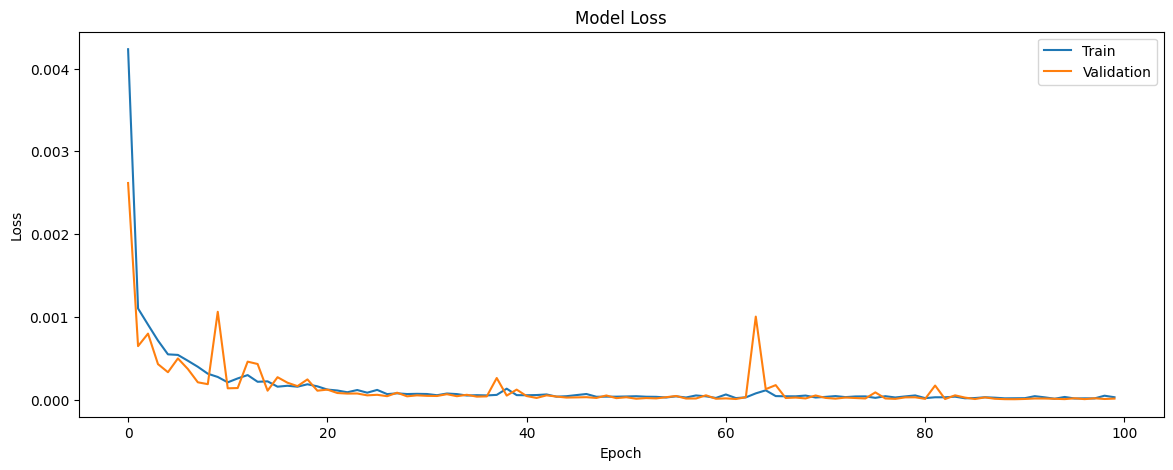

<ipython-input-3-5f85775da0cd>:143: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


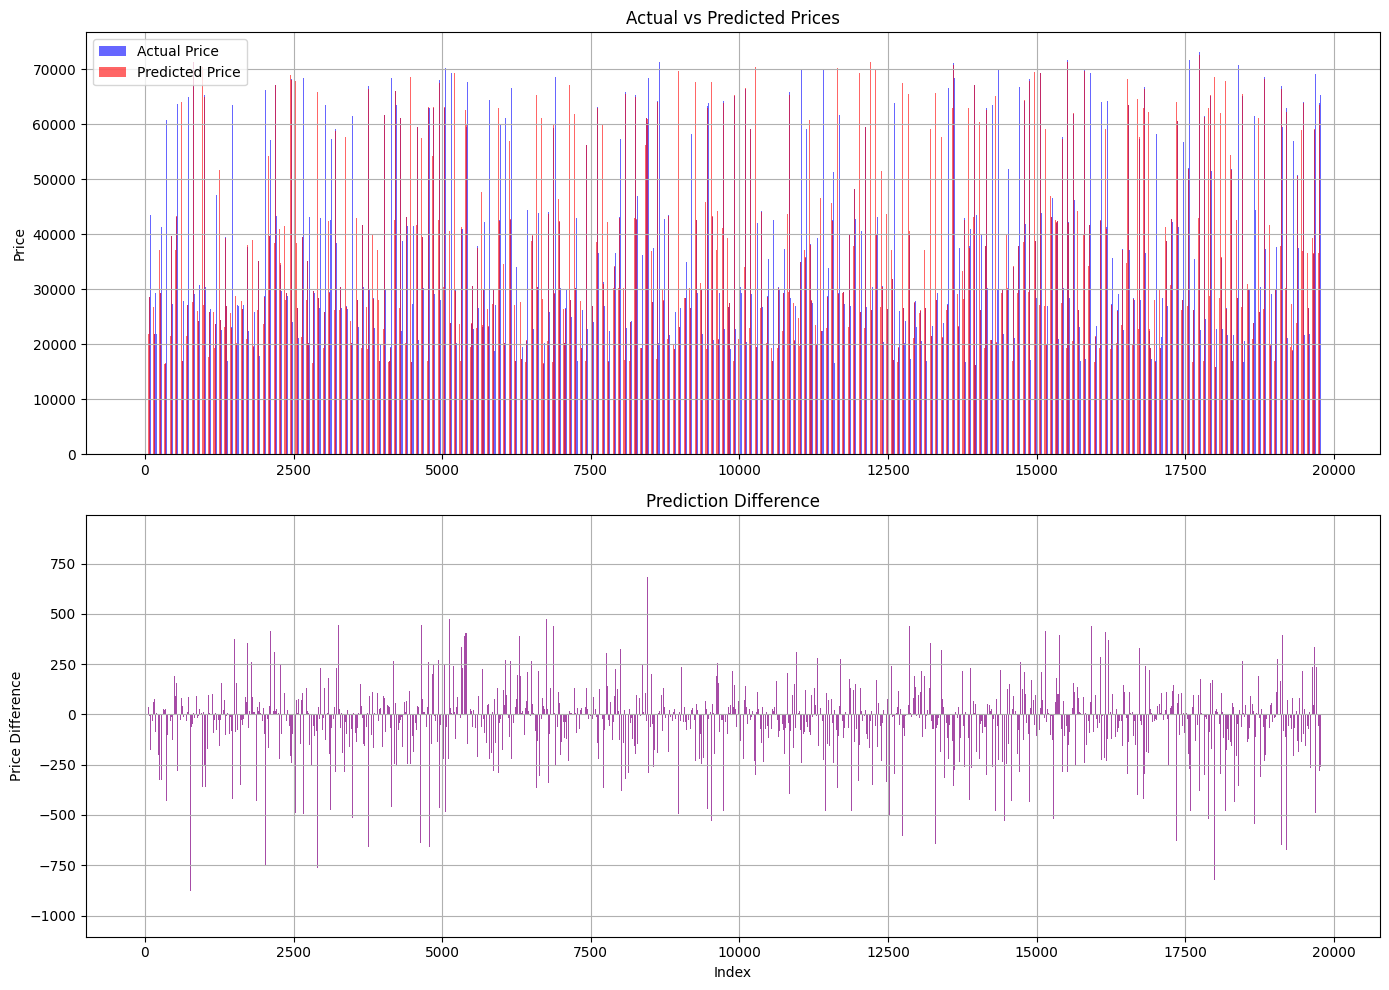

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Проверка доступности GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Training will be performed on: {gpus}")
else:
    print("No GPU found, training will be performed on CPU.")

# Загрузка данных
data = pd.read_csv('binance_full_data.csv')  # Убедитесь, что путь к файлу указан правильно

# Подготовка данных
# Создание столбца с целевой переменной - предсказание цены закрытия на следующий день
data['Next Close Price'] = data['Close Price'].shift(-1)

# Удалим последнюю строку, так как она будет иметь NaN в целевой переменной
data = data[:-1]

# Функция для создания запаздывающих признаков с учетом всех данных за последние 90 дней
def create_lag_features(data, lag=90):
    features = pd.DataFrame()
    for i in range(1, lag + 1):
        features[f'Open Price lag_{i}'] = data['Open Price'].shift(i)
        features[f'High Price lag_{i}'] = data['High Price'].shift(i)
        features[f'Low Price lag_{i}'] = data['Low Price'].shift(i)
        features[f'Close Price lag_{i}'] = data['Close Price'].shift(i)
        features[f'Volume lag_{i}'] = data['Volume'].shift(i)
        features[f'MA7 lag_{i}'] = data['MA7'].shift(i)
        features[f'MA25 lag_{i}'] = data['MA25'].shift(i)
        features[f'MA99 lag_{i}'] = data['MA99'].shift(i)
        features[f'MA200 lag_{i}'] = data['MA200'].shift(i)
        features[f'ES7 lag_{i}'] = data['ES7'].shift(i)
        features[f'ES25 lag_{i}'] = data['ES25'].shift(i)
        features[f'ES99 lag_{i}'] = data['ES99'].shift(i)
        features[f'DES7 lag_{i}'] = data['DES7'].shift(i)
        features[f'DES25 lag_{i}'] = data['DES25'].shift(i)
        features[f'DES99 lag_{i}'] = data['DES99'].shift(i)
        features[f'TES7 lag_{i}'] = data['TES7'].shift(i)
        features[f'TES25 lag_{i}'] = data['TES25'].shift(i)
        features[f'TES99 lag_{i}'] = data['TES99'].shift(i)
        features[f'EMA7 lag_{i}'] = data['EMA7'].shift(i)
        features[f'EMA25 lag_{i}'] = data['EMA25'].shift(i)
        features[f'EMA99 lag_{i}'] = data['EMA99'].shift(i)
        features[f'EMA200 lag_{i}'] = data['EMA200'].shift(i)
        features[f'RSI7 lag_{i}'] = data['RSI7'].shift(i)
        features[f'RSI14 lag_{i}'] = data['RSI14'].shift(i)
        features[f'RSI25 lag_{i}'] = data['RSI25'].shift(i)
    return features

# Создаем признаки с лагом за последние 90 дней
features = create_lag_features(data, lag=90)

# Удалим строки с NaN, которые возникли из-за сдвига
features = features.dropna()

# Соответственно удалим последние строки из целевой переменной, чтобы они совпадали по размеру с признаками
target = data['Next Close Price'].iloc[90:].reset_index(drop=True)

# Масштабирование признаков и целевой переменной
feature_scaler = MinMaxScaler()
features_scaled = feature_scaler.fit_transform(features)

target_scaler = MinMaxScaler()
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Разделение данных на обучающую и тестовую выборки (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_scaled, test_size=0.2, random_state=42)

# Построение и компиляция модели с несколькими слоями
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Линейная активация для регрессии

model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели с использованием GPU (если доступен)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Прогнозирование цен на тестовых данных
y_pred_scaled = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled)  # Преобразование обратно в оригинальный масштаб
y_test = target_scaler.inverse_transform(y_test)  # Преобразование обратно в оригинальный масштаб

# Вычисление разницы между предсказанными и фактическими ценами
price_difference = y_pred.flatten() - y_test.flatten()

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs(price_difference / y_test.flatten())) * 100

# Среднее колебание цены Биткоина за день
mean_price_change = np.mean(np.abs(np.diff(data['Close Price'])))
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Mean Daily Price Change: {mean_price_change}")

# Построение графика потерь
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# Построение графика фактических и предсказанных цен
plt.figure(figsize=(14, 10))

# График предсказанных цен
plt.subplot(2, 1, 1)
plt.bar(range(len(y_test)), y_test.flatten(), width=0.4, label='Actual Price', color='blue', alpha=0.6, align='center')
plt.bar(range(len(y_pred)), y_pred.flatten(), width=0.4, label='Predicted Price', color='red', alpha=0.6, align='edge')
plt.title('Actual vs Predicted Prices')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# График разницы в цене
plt.subplot(2, 1, 2)
plt.bar(range(len(price_difference)), price_difference, color='purple', alpha=0.7)
plt.title('Prediction Difference')
plt.xlabel('Index')
plt.ylabel('Price Difference')
plt.ylim(min(price_difference) * 1.1, max(price_difference) * 1.1)  # Установка диапазона y
plt.grid(True)

plt.tight_layout()
plt.show()
